<a href="https://colab.research.google.com/github/angelolmg/aprendizagem-maquina/blob/main/3_Random_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aprendizagem de máquina e mineração de dados (14/03/24)
### Árvores de classificação, árvores de regressão e floresta aleatória (random forest)



"Uma **árvore de decisão** é um modelo de aprendizado de máquina supervisionado que é utilizado para **problemas de classificação e regressão**. Ela opera **dividindo recursivamente o conjunto de dados** em subconjuntos menores com base nos valores das características, de forma que em cada nó da árvore, uma decisão é tomada sobre qual atributo divide melhor os dados"

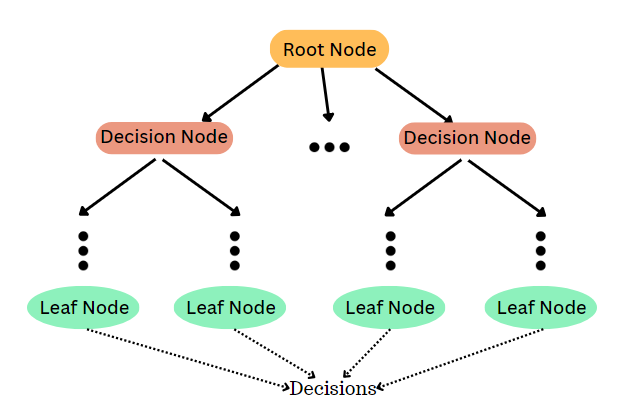

## 1. Árvore de classificação

### 1.1 Montando uma árvore de decisão: determinar se uma pessoa gosta de ir ao cinema baseado no **gosto dela por pipoca, refrigerante e idade**.
Exemplo baseado na aula de Josh Starmer: [Decision and Classification Trees, Clearly Explained!!!](https://www.youtube.com/watch?v=_L39rN6gz7Y)

Dados iniciais:

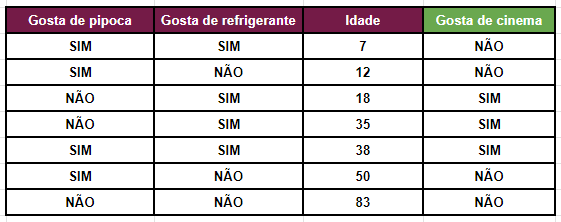

**Primeiro passo**: avaliar a quão bem cada variável prediz se alguém gosta ou não de cinema

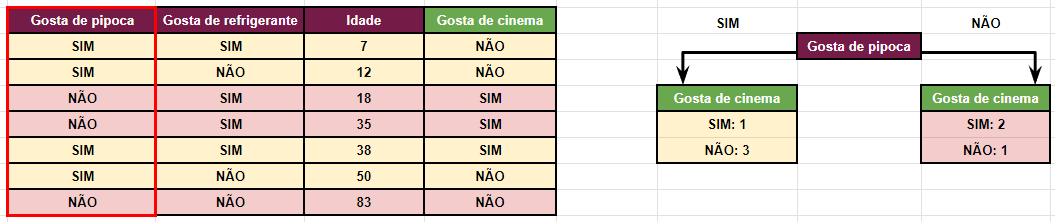

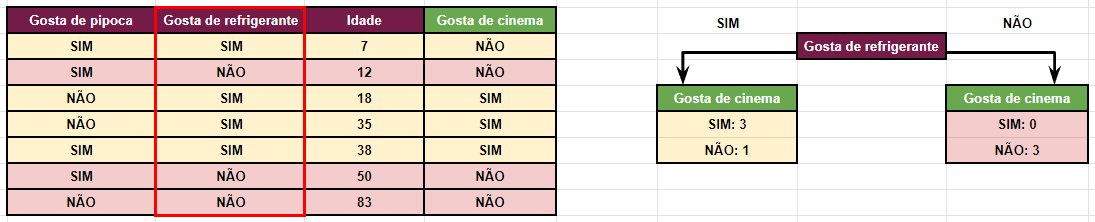

Para calcular a **qualidade das decisões** devemos realizar a **quantização de "impureza"** de cada variável. Quanto mais "puro" o nó de decisão (menor nível de impureza), melhor este é em discriminar os dados.

Há diferentes métricas para avaliar impureza, a mais comum é o "**índice de Gini**", representado pela fórmula: $Gini = 1 - Σ(p(i)^{2})$. Cada nó folha possui um índice Gini:

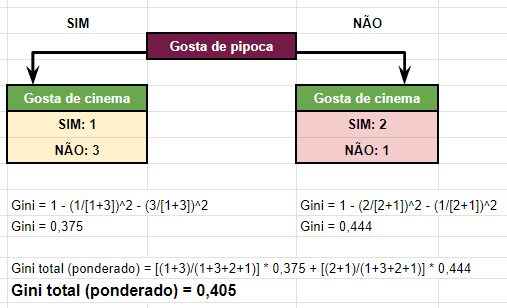

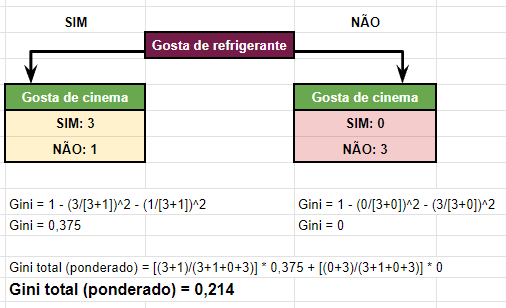

Para calcular o éndice Gini de **variáveis continuas**, como a idade, é necessário ordenar as amostras pela variável, obter a média para cada par de idades, calcular o índice para cada média e selecionar o menor:

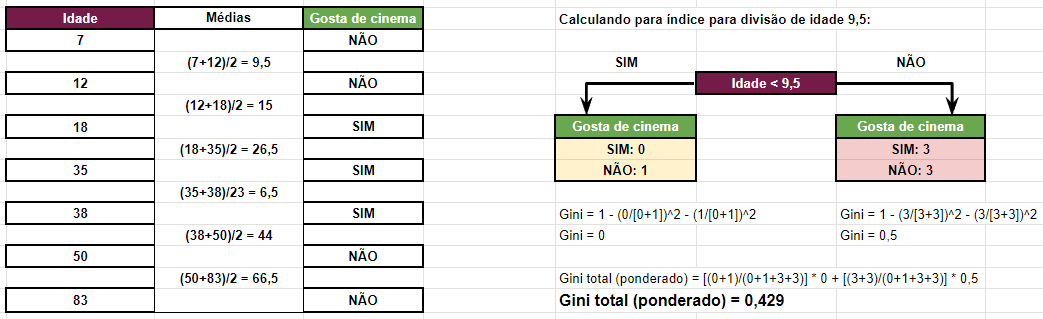

Calculando o resto dos índices para cada uma das médias temos:

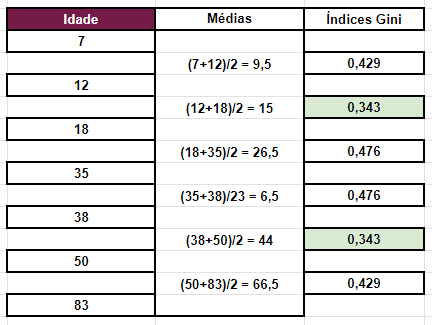

Médias 15 e 44 empataram com o menor índice de impureza, portanto qualquer uma das médias pode ser escolhida.

Como entre os 3 nós de decisão (0,405 vs 0,214 vs 0,343) o "gosta de refrigerante" tem o menor nível de impureza, ele se torna a raiz da árvore:

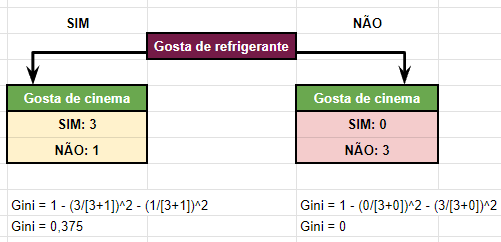

Por voto de maioria podemos tornar as folhas finais em "gosta de cinema" para SIM e "não gosta de cinema" para NÃO.

No entanto, como a folha SIM ainda possui Gini > 0, podemos escolher continuar iterativamente o processo, só com as amostras que respondem SIM para "gosta de refrigerante":

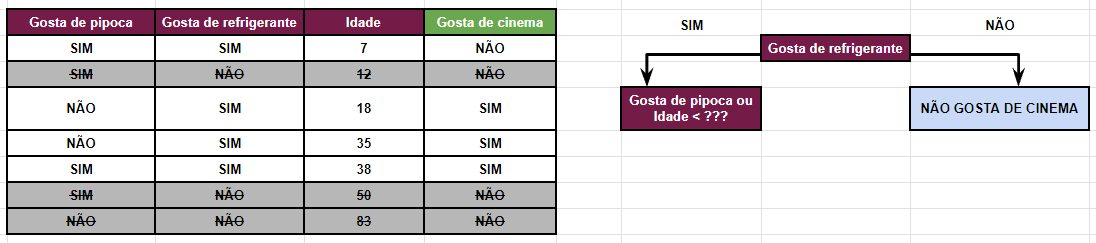

Calculando o índice Gini para "gosta de pipoca" e para as novas médias de idade usando o novo grupo reduzido de amostras, obtemos que o menor Gini é "Idade < 12,5" com Gini = 0:

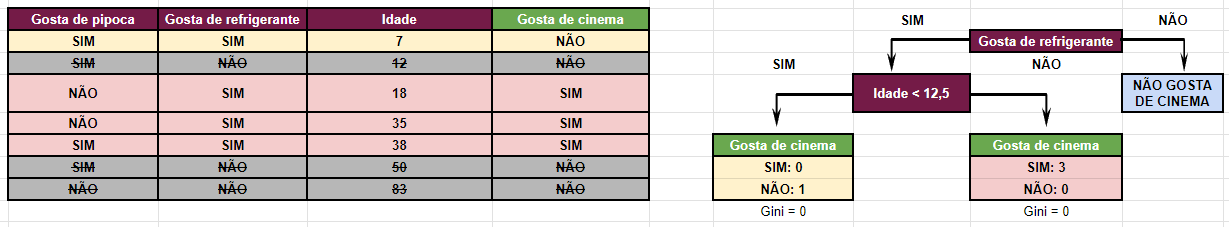

Como Gini = 0 nas folhas finais podemos parar e determinar a saída por voto de maioria, gerando a árvore de decisão final para este exemplo:

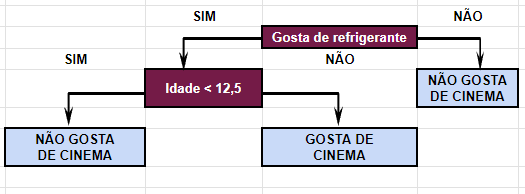

### 1.2 Exemplo: determinar o nível de risco (**alto ou baixo**) de uma pessoa ter um ataque cardiaco levando em conta a **idade**, **peso** e se é **fumante**

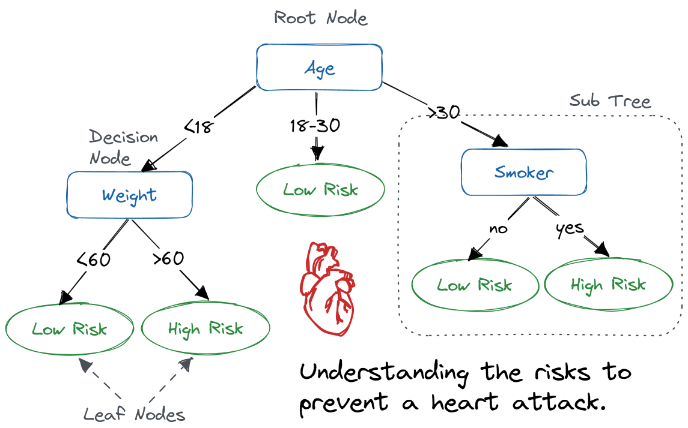

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Dados de treinamento
# [idade, peso, fumante] e a classe (0 - Baixo risco, 1 - Alto risco)
X = np.array([[45, 70, 1],
              [55, 90, 1],
              [60, 75, 0],
              [40, 85, 0],
              [50, 65, 1],
              [70, 100, 1]])

y = np.array([0, 1, 0, 1, 1, 1])

# Criando o modelo de árvore de decisão
modelo_arvore = DecisionTreeClassifier()

# Treinando o modelo
modelo_arvore.fit(X, y)

In [ ]:
# Teste com uma pessoa com 58 anos, 78 quilos e não fumante
nova_pessoa1 = np.array([[58, 78, 0]])
previsao1 = modelo_arvore.predict(nova_pessoa1)

print("Idade:", nova_pessoa1[0, 0])
print("Peso:", nova_pessoa1[0, 1])
print("Fumante:", "Sim" if nova_pessoa1[0, 2] == 1 else "Não")

if previsao1 == 0:
    print("Baixo risco de ataque cardíaco.")
else:
    print("Alto risco de ataque cardíaco.")

# Teste com outra pessoa com 50 anos, 90 quilos e fumante
nova_pessoa2 = np.array([[50, 90, 1]])
previsao2 = modelo_arvore.predict(nova_pessoa2)

print("\nIdade:", nova_pessoa2[0, 0])
print("Peso:", nova_pessoa2[0, 1])
print("Fumante:", "Sim" if nova_pessoa2[0, 2] == 1 else "Não")

if previsao2 == 0:
    print("Baixo risco de ataque cardíaco.")
else:
    print("Alto risco de ataque cardíaco.")


Idade: 58
Peso: 78
Fumante: Não
Baixo risco de ataque cardíaco.

Idade: 50
Peso: 90
Fumante: Sim
Alto risco de ataque cardíaco.


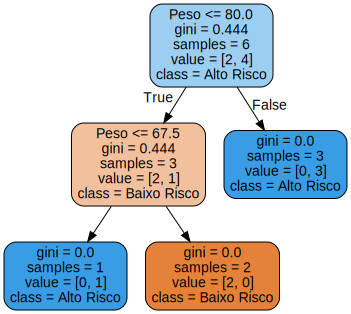

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# Exporta a árvore de decisão para um arquivo .dot
export_graphviz(modelo_arvore, out_file='arvore_decisao.dot',
                feature_names=['Idade', 'Peso', 'Fumante'],
                class_names=['Baixo Risco', 'Alto Risco'],
                filled=True, rounded=True)

# Lê o arquivo .dot e renderiza a árvore de decisão
with open('arvore_decisao.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


Neste caso, com a pequena quantidade de dados fornecidos, o atributo "peso" se mostrou altamente discriminativo, dessa maneira o algoritmo acaba por utilizar apenas esta variável.

Também, enquanto gini > 0 continua-se dividindo os nós, no entanto isso pode caracterizar *overfitting*. Então geralmente há um compromisso/*trade-off* a se fazer entre o nível de impureza, quantidade de amostras a serem separadas e generalização do modelo.

## 2. Árvore de regressão

Em uma árvore de regressão a **váriavel alvo** é possui um **valor contínuo**, ao invés de uma classe como na árvore de classificação. Uma árvore de regressão que prevê **efetividade de uma medicação** a depender da **idade**, **sexo** e **dosagem** pode ser representada da seguinte maneira:

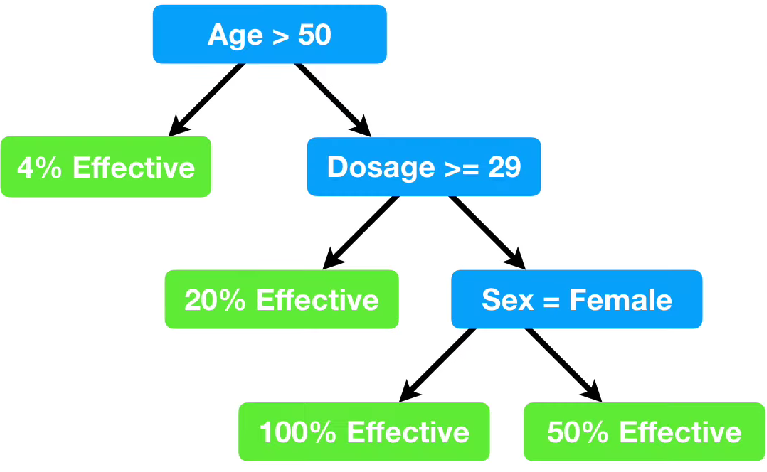

Para tal se calcula o **SSR** (*sum of square residuals* ou soma dos quadrados das diferenças) para cada média entre valores vizinhos de cada variável e se escolhe o com menor SSR.

Trata-se de um algoritmo simples, porém intensivo em cálculos. Vou deixar outro tutorial mostrando passo-a-passo como foi contruída a árvore acima: [Regression Trees, Clearly Explained!!!](https://www.youtube.com/watch?v=g9c66TUylZ4)

### 2.1 Exemplo: determinar o **preço previsto de uma casa** baseado na **área** (em metros quadrados) e **número de quartos**

In [ ]:
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Dados de treinamento
# Suponha que as características sejam: área (em metros quadrados) e número de quartos
X = np.array([[50, 2],
              [100, 3],
              [150, 4],
              [200, 5],
              [250, 6]])

# Preços correspondentes das casas
y = np.array([100000, 150000, 200000, 250000, 300000])

# Criando o modelo de árvore de decisão para regressão
modelo_arvore_reg = DecisionTreeRegressor()

# Treinando o modelo
modelo_arvore_reg.fit(X, y)

# Agora podemos fazer previsões para novas casas
# Suponha que queremos prever o preço de uma casa com 180 metros quadrados e 4 quartos
nova_casa = np.array([[180, 4]])
preco_previsto = modelo_arvore_reg.predict(nova_casa)

print("Preço previsto para a nova casa:", preco_previsto[0])


Preço previsto para a nova casa: 200000.0


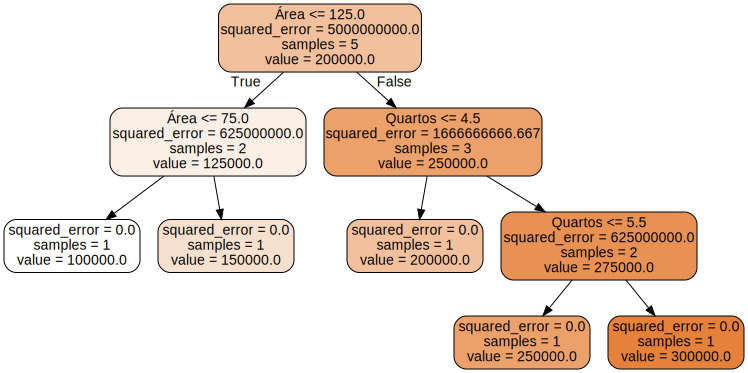

In [ ]:
from sklearn.tree import export_graphviz
import graphviz

# Exporta a árvore de regressão para um arquivo .dot
export_graphviz(modelo_arvore_reg, out_file='arvore_regressao.dot',
                feature_names=['Área', 'Quartos'],
                filled=True, rounded=True)

# Lê o arquivo .dot e renderiza a árvore de regressão
with open('arvore_regressao.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


## 3. Floresta aleatória (Random Forest)

No algoritmo de random forest geramos um número árbitrario $n$ de árvores utilizando o algoritmo de **bagging**. No bagging geramos um novo *dataset* para cada árvore a partir do original. Isso se dá pela aplicação de dois processos aleatórios:

1. Seleção de uma **porção aleatória de amostras** (*E.g.* 25%). Esta amostragem é com reposição, ou seja, permite que amostras se repitam.
2. Seleção de apenas **uma parte das variáveis**/*features*, sem reposição (*E.g.* se a amostra possui $x$ características podemos selecionar aleatoriamente $\sqrt{x}$ delas)

Após geradas $n$ árvores, a decisão final é tomada por voto da maioria:

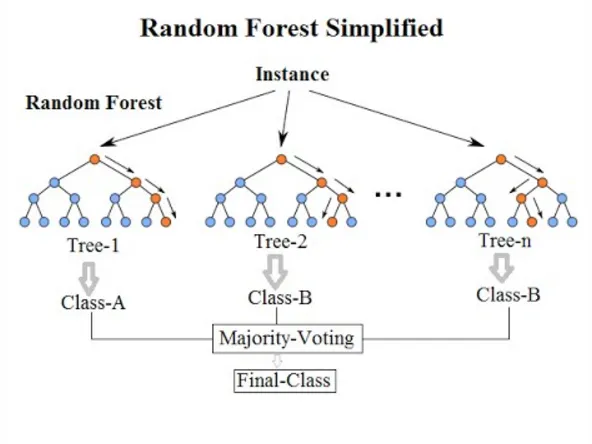

O random forest supera o método de árvore de decisão simples, pois produz um modelo com menor variância, ou seja, não tão suscetível a mudanças nos dados e *outliers*, produzindo resultados que **refletem melhor a tendência dos dados**.

### 3.1 Exemplo: determinar se cliente **comprou ou não um produto** específico baseado na **idade**, **gênero**, **renda** e **histórico de compras**.

In [ ]:
# Importando as bibliotecas necessárias
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd

# Criando um conjunto de dados de exemplo
data = {
    'Idade': [25, 35, 45, 20, 30, 50, 55, 35, 40, 55],
    'Gênero': ['M', 'F', 'M', 'M', 'F', 'F', 'M', 'F', 'M', 'M'],
    'Renda': [50000, 60000, 75000, 40000, 65000, 80000, 85000, 75000, 70000, 90000],
    'Historico_Compras': ['Alto', 'Baixo', 'Alto', 'Baixo', 'Alto', 'Alto', 'Baixo', 'Alto', 'Alto', 'Alto'],
    'Comprou': ['Sim', 'Não', 'Sim', 'Não', 'Sim', 'Sim', 'Não', 'Sim', 'Sim', 'Sim']
}

# Criando um DataFrame a partir do conjunto de dados
df = pd.DataFrame(data)

df

,Idade,Gênero,Renda,Historico_Compras,Comprou
0,25,M,50000,Alto,Sim
1,35,F,60000,Baixo,Não
2,45,M,75000,Alto,Sim
3,20,M,40000,Baixo,Não
4,30,F,65000,Alto,Sim
5,50,F,80000,Alto,Sim
6,55,M,85000,Baixo,Não
7,35,F,75000,Alto,Sim
8,40,M,70000,Alto,Sim
9,55,M,90000,Alto,Sim


Aplicando *one-hot-encoding* para tornar variáveis categóricas em numéricas

In [ ]:
# Convertendo variáveis categóricas em variáveis dummy
df = pd.get_dummies(df, columns=['Gênero', 'Historico_Compras'])

df

,Idade,Renda,Comprou,Gênero_F,Gênero_M,Historico_Compras_Alto,Historico_Compras_Baixo
0,25,50000,Sim,0,1,1,0
1,35,60000,Não,1,0,0,1
2,45,75000,Sim,0,1,1,0
3,20,40000,Não,0,1,0,1
4,30,65000,Sim,1,0,1,0
5,50,80000,Sim,1,0,1,0
6,55,85000,Não,0,1,0,1
7,35,75000,Sim,1,0,1,0
8,40,70000,Sim,0,1,1,0
9,55,90000,Sim,0,1,1,0


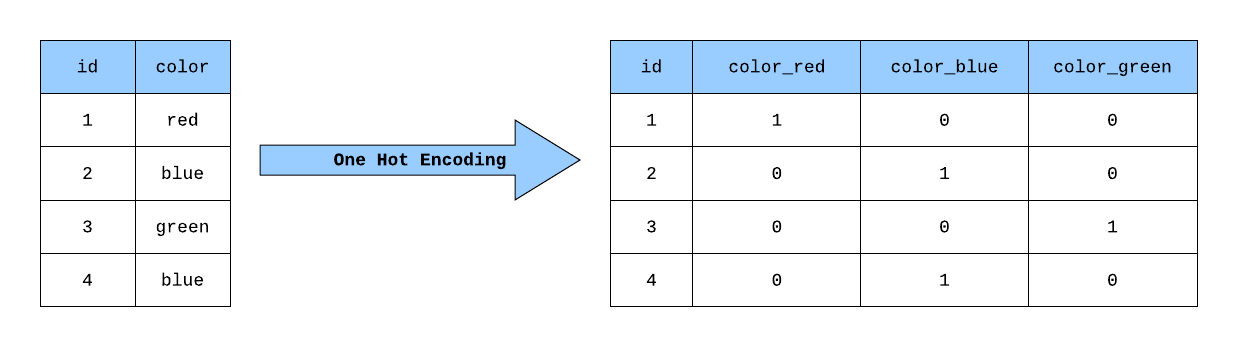

In [ ]:
# Separando os dados em variáveis independentes (X) e variável dependente (y)
X = df.drop('Comprou', axis=1)
y = df['Comprou']

# Dividindo o conjunto de dados em dados de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Criando e treinando o modelo Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Fazendo previsões com o conjunto de teste
y_pred = model.predict(X_test)

# Calculando a precisão do modelo
accuracy = accuracy_score(y_test, y_pred)
print("A precisão do modelo Random Forest é:", accuracy)

A precisão do modelo Random Forest é: 1.0


Visualizando **uma** das árvores aleatórias. Há um total de 100 (`n_estimators=100`) neste exemplo.

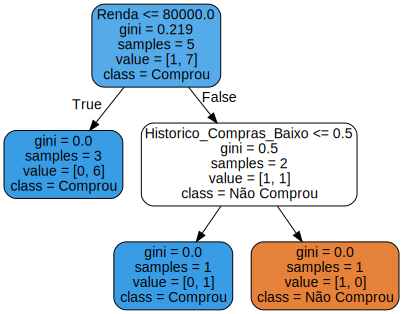

In [ ]:
from sklearn import tree

# Visualize uma das árvores no modelo
tree_visualization = tree.export_graphviz(model.estimators_[0], out_file=None,
                                          feature_names=X_train.columns,
                                          class_names=['Não Comprou', 'Comprou'],
                                          filled=True, rounded=True)

# Renderize a árvore usando graphviz
graph = graphviz.Source(tree_visualization)
graph.render("random_forest_tree", format="png", cleanup=True)

# Visualize a árvore
graph